In [1]:
# -*- coding: utf-8 -*-

#!/usr/bin/python
# -*- coding: utf-8 -*-

In [2]:
__author__ = 'pnovais'

## Análise exploratória
**Dataset Carros**

Dataset sobre carros importados em 1985, com informações sobre características desses carros, risco atribuidos por seguradoras e taxa de dasvalorização.

In [3]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline

In [4]:
ini=time.time()

In [5]:
plt.style.use('mystyle-paty.mplstyle')

In [6]:
df = pd.read_csv('carros.csv')

**>** O dataset é composto por diversos tipos de variáveis: categóricas (nominais e ordinais) e contínuas.

In [7]:
# Overview dos dados
df.head()

,riskiness,losses,make,fuel type,aspiration,doors,body,drive,engine location,wheel base,...,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


# Listando as informações contidas no dataset
- riskiness: Classificação do risco associado à subscrição de uma nova apólice e o prêmio que deve ser cobrado pela cobertura
- losses: Taxa de desvalorização
- make: Fabricante
- fuel type: tipo de combustível
- aspiration: motores aspirados ou turbinados
- doors: quantidade de portas
- body: tipo de carro (sedan, hatch...)
- drive: Tração
- engine location: localização do motor
- wheel base: distância entre os eixos das rodas dianteiras e traseiras
- length: comprimento
- width: largura
- height: altura
- weight: peso
- engine type: tipo de motor
- cylinders: quantidade de cilindros
- engine size: tamanho do motor
- fuel system: Injeção de combustível
- bore: diâmetro do cilindro
- stroke: tempo do motor (ciclo)
- compression ratio: Taxa de compressão (É um valor numérico adimensional representando a proporção entre o volume aspirado somado ao volume da câmara de combustão em relação ao volume da câmara de combustão)
- horsepower: cavalos de potência
- peak rpm: pico velocidade de rotação do motor
- city mpg: eficiência do combustível na cidade (milhas por galão)
- highway mpg: eficiência do combustível na estrada (milhas por galão)
- price: preço

In [8]:
# Verificando a existência de missing data
df.isnull().sum()

riskiness            0
losses               0
make                 0
fuel type            0
aspiration           0
doors                0
body                 0
drive                0
engine location      0
wheel base           0
length               0
width                0
height               0
weight               0
engine type          0
cylinders            0
engine size          0
fuel system          0
bore                 0
stroke               0
compression ratio    0
horsepower           0
peak rpm             0
city mpg             0
highway mpg          0
price                0
dtype: int64

**>** Inicialmente, podemos verificar qual a correlação entre todas as variáveis quantitativas, utilizando para isso a função .corr() do Pandas. Ainda, escolheremos como método o Coeficiente de Spearman

In [9]:
corr = df.corr(method='spearman')

In [10]:
# Verificando as correlações
corr

,riskiness,losses,wheel base,length,width,height,weight,engine size,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
riskiness,1.000000,0.515092,-0.474859,-0.367706,-0.227694,-0.446052,-0.298966,-0.218862,-0.279672,-0.006563,0.056314,-0.115080,0.222557,0.110365,0.177838,-0.234714
losses,0.515092,1.000000,-0.085432,0.037279,0.108141,-0.370895,0.078453,0.127436,-0.058019,0.092962,-0.061650,0.222648,0.269511,-0.221525,-0.163378,0.167818
wheel base,-0.474859,-0.085432,1.000000,0.918438,0.811529,0.620240,0.822332,0.767753,0.635677,0.202749,-0.079440,0.643213,-0.253055,-0.639143,-0.651998,0.794491
length,-0.367706,0.037279,0.918438,1.000000,0.872792,0.531937,0.906180,0.846777,0.696806,0.156580,-0.144059,0.746815,-0.220075,-0.759088,-0.765713,0.876648
width,-0.227694,0.108141,0.811529,0.872792,1.000000,0.358238,0.851756,0.845848,0.644528,0.231755,-0.103021,0.745498,-0.198362,-0.724600,-0.724029,0.838625
height,-0.446052,-0.370895,0.620240,0.531937,0.358238,1.000000,0.426485,0.263042,0.304020,-0.056799,0.017935,0.137197,-0.234428,-0.244084,-0.281284,0.364381
weight,-0.298966,0.078453,0.822332,0.906180,0.851756,0.426485,1.000000,0.905497,0.719732,0.166965,-0.206790,0.821371,-0.243948,-0.843382,-0.855204,0.925568
engine size,-0.218862,0.127436,0.767753,0.846777,0.845848,0.263042,0.905497,1.000000,0.733817,0.344205,-0.197295,0.849434,-0.277295,-0.798525,-0.792100,0.866491
bore,-0.279672,-0.058019,0.635677,0.696806,0.644528,0.304020,0.719732,0.733817,1.000000,-0.093915,-0.181243,0.650152,-0.360172,-0.635414,-0.650995,0.658211
stroke,-0.006563,0.092962,0.202749,0.156580,0.231755,-0.056799,0.166965,0.344205,-0.093915,1.000000,0.038902,0.193357,-0.016251,-0.045637,-0.024014,0.167775


**>** Claramente, a matriz acima não é muito intuita, então o uso de uma matrix de correlação facilita a visualização das correlações

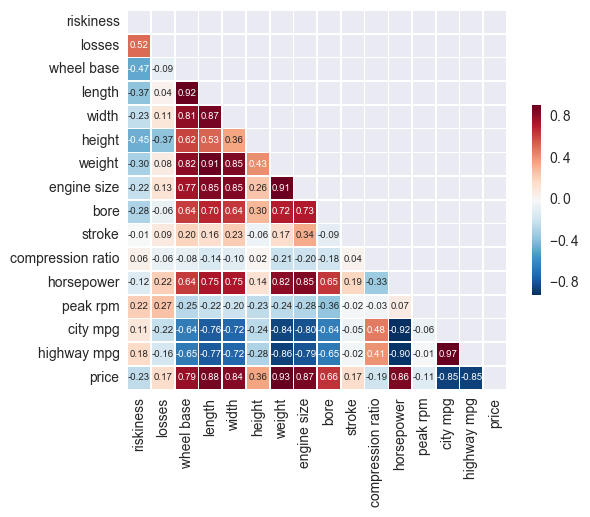

In [11]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure()
#fig.set_figheight(9)
#fig.set_figwidth(9)

ax = sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, annot_kws={"size":7}, fmt='3.2f')

**>** O *heatmap* acima mostra que há várias correlações entre as variáveis. Entretanto, é importante verificar que há correlações que são fortes pois uma característica deriva da outra. Por exemplo, as variáveis "length" e "wheel base" possuem uma correlação de **0.92**, mas isso é esperado uma vez que quanto mais longo (lenght) for o automóvel mais distante será os eixos das rodas (wheel base). Assim, as correlações que já eram esperadas são:
-  lenght x whell base
-  lenght x width
-  weight x lenght
-  weight x width
- Highway mpg x city mpg

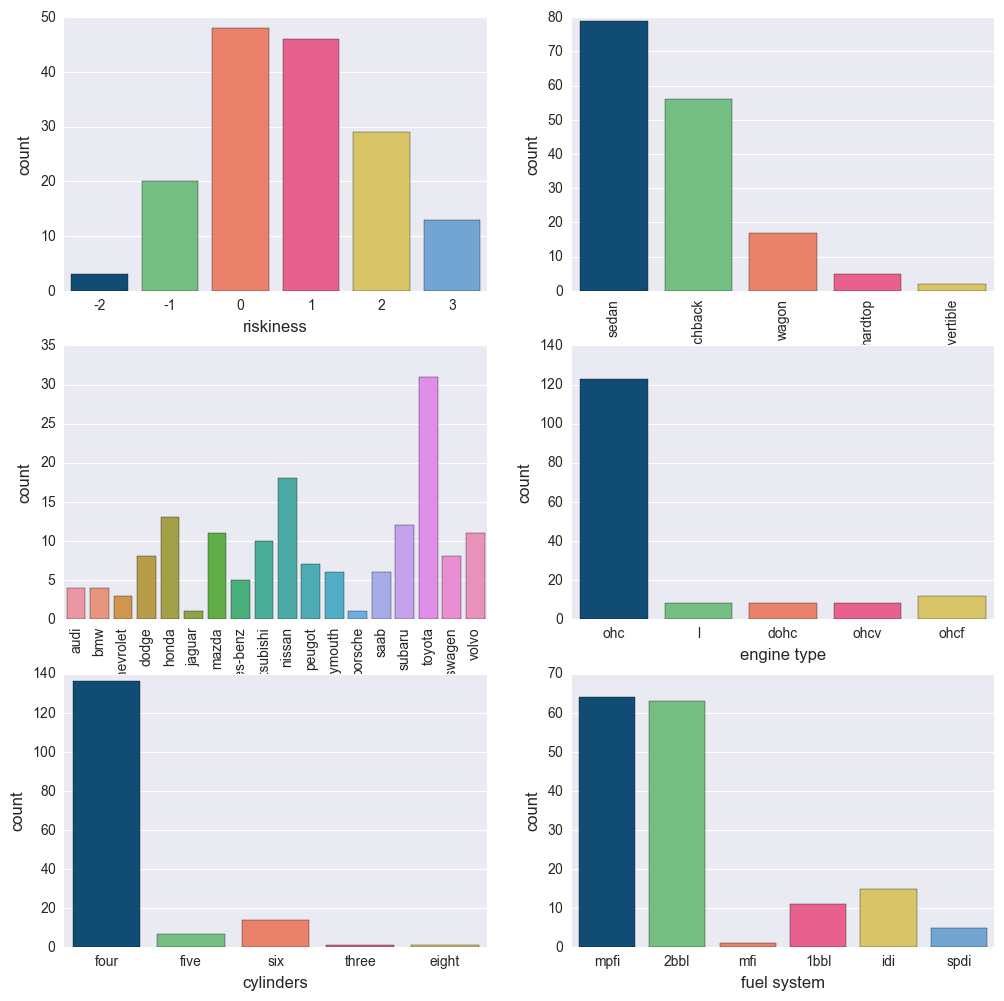

In [12]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(12)

ax1 = plt.subplot(323)
ax1 = sns.countplot(x='make',data=df)
plt.xticks(rotation='vertical')

ax2 = plt.subplot(322)
ax2 = sns.countplot(x='body',data=df)
plt.xticks(rotation='vertical')

ax3 = plt.subplot(321)
ax3 = sns.countplot(x='riskiness',data=df)

ax4 = plt.subplot(324)
ax4 = sns.countplot(x='engine type', data=df)

ax5 = plt.subplot(325)
ax5 = sns.countplot(x='cylinders', data=df)

ax6 = plt.subplot(326)
ax6 = sns.countplot(x='fuel system', data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

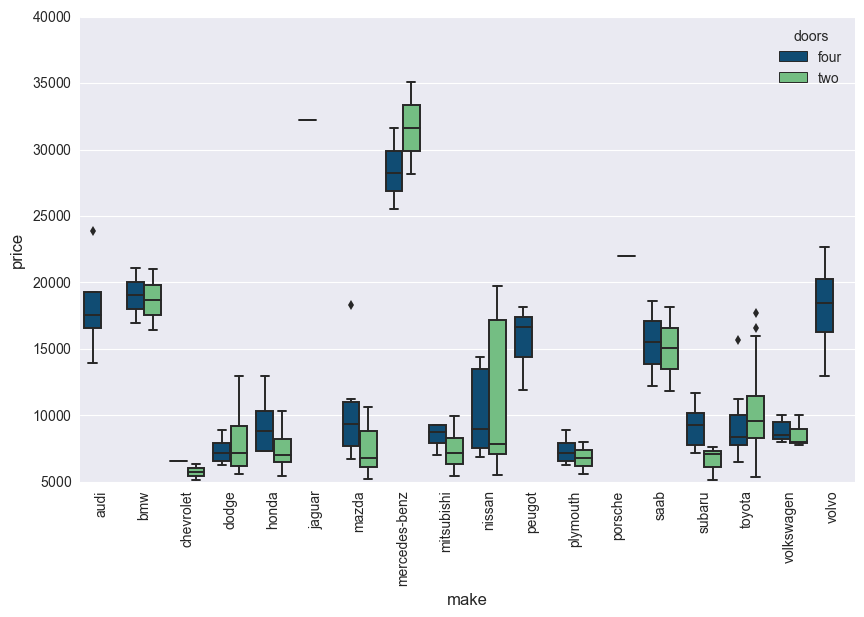

In [13]:
fig=plt.figure()
fig.set_figheight(6)
fig.set_figwidth(10)
sns.boxplot(x="make", y="price", data=df, hue='doors')
plt.xticks(rotation='vertical')

In [14]:
fim = time.time()
time_proc = fim - ini
print('')
#print(bcolors.FAIL +'-'*79+ bcolors.ENDC)
print('-------------------')
print('tempo de processamento: %fmin' %(time_proc/60))
print('-------------------')
today = datetime.datetime.now()
print('Hoje é %s/%s/%s, às %s:%s' %(today.day,today.month, today.year, today.hour, today.minute))


-------------------
tempo de processamento: 0.136959min
-------------------


NameError: name 'datetime' is not defined